In [13]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Paso 1: Cargar el conjunto de datos

Para este ejercicio, usaremos un conjunto de datos de precios de casas de California

In [29]:
cali = fetch_california_housing()
data = pd.DataFrame(cali.data, columns=cali.feature_names)


Visualiza la distribución de la variable objetivo (MedHouseVal).


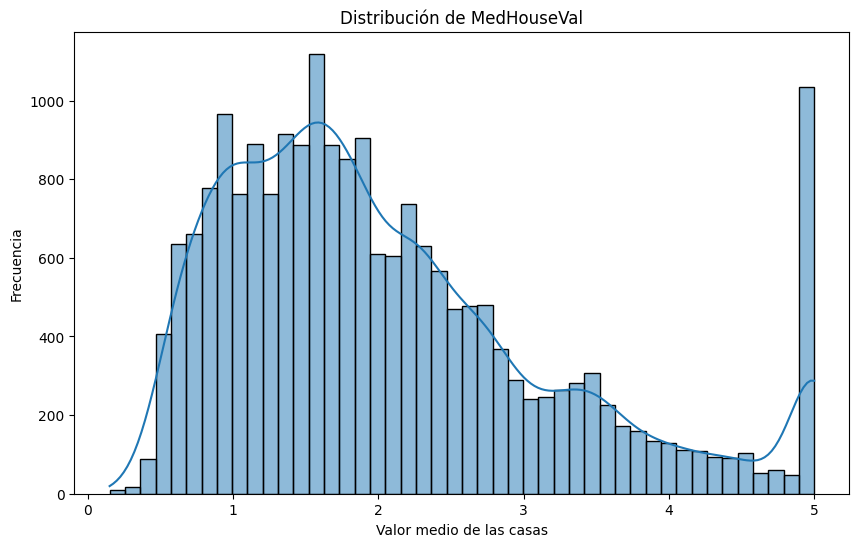

In [30]:
data['MedHouseVal'] = cali.target
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], kde=True)
plt.title('Distribución de MedHouseVal')
plt.xlabel('Valor medio de las casas')
plt.ylabel('Frecuencia')
plt.show()

Observaciones:

- Hay más casas con valores bajos a medios, y menos casas con valores muy altos.

- La mayor frecuencia de valores se encuentra cerca del 1.5, donde se presenta el pico más alto del histograma.

- Hay una gran cantidad de casos en el extremo derecho, lo que podría indicar la presencia de casos atípicos que podrían afectar el modelo de regresión.

Crea una matriz de correlación para identificar relaciones entre las características.

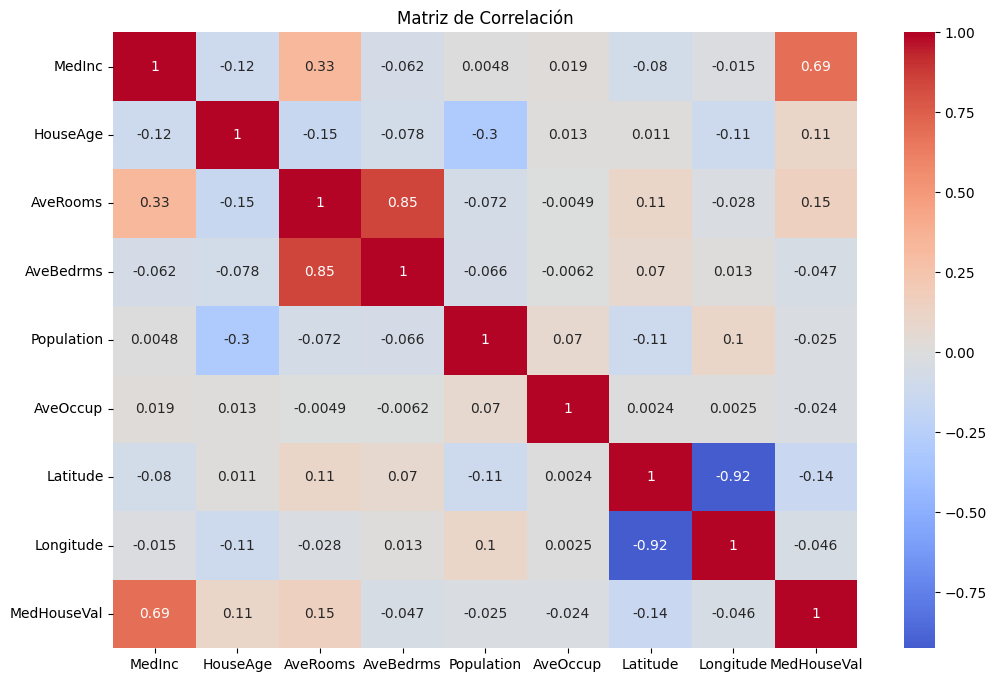

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Observaciones:

- La correlación más fuerte de MedHouseVal es con MedInc, lo que indicaque el ingreso medio tiene una fuerte relación positiva con el valor de las casas

- AveOccup tiene correlaciones muy bajas con todas las demás variables, Population también muestra correlaciones débiles en general

Visualiza la relación entre una característica de tu elección (por ejemplo, HouseAge) y la variable objetivo (MedHouseVal).

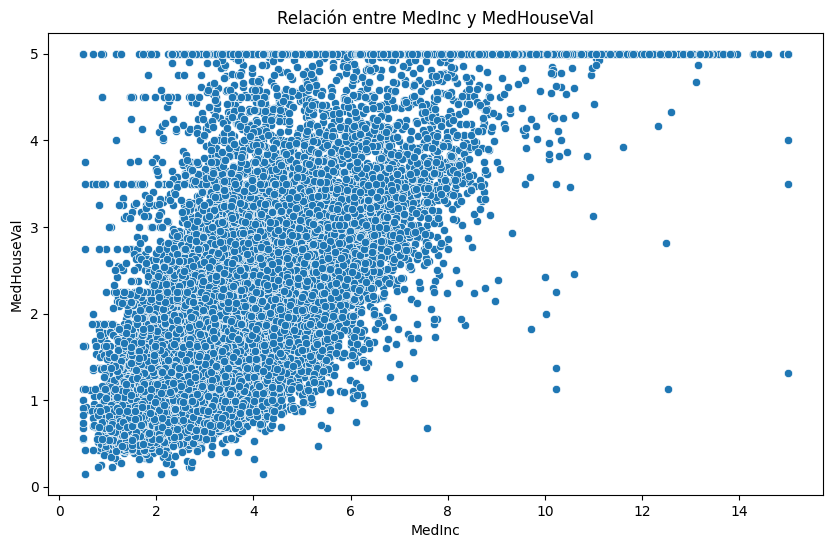

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MedInc', y='MedHouseVal')
plt.title('Relación entre MedInc y MedHouseVal')
plt.show()

Observaciones:

- Se observa una clara tendencia positiva: a medida que aumenta el ingreso medio, también aumenta el valor de las casas

- La concentración más densa de puntos se encuentra en la región de ingresos medios bajos a medios (entre 2 y 6)

- Hay varios puntos que se desvían del patrón general, Se observan algunos casos de ingresos muy altos con valores de casas relativamente bajos. También hay casos de valores de casas altos con ingresos medios

Elimina datos no útiles (por ejemplo, valores nulos).

In [8]:
data = data.dropna()


Elimina datos atípicos utilizando un umbral de 3 desviaciones estándar.

In [33]:
for column in data.columns:
    mean = data[column].mean()
    std = data[column].std()
    # Filtra los datos que están dentro de ±3 desviaciones estándar
    data = data[(data[column] >= mean - 3*std) & (data[column] <= mean + 3*std)] 

Entrena un modelo de regresión lineal utilizando el conjunto de entrenamiento seleccionando una característica y el regresos de sklearn.

In [34]:
X1 = data[['MedInc']]
y = data['MedHouseVal']

# División de datos
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo1 = LinearRegression()
modelo1.fit(X1_train, y_train)

LinearRegression()

Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo.


In [35]:
y_pred1 = modelo1.predict(X1_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("\nModelo 1:")
print(f"Error cuadrático medio: {mse1}")
print(f"Coeficiente de determinación: {r2_1}")


Modelo 1:
Error cuadrático medio: 0.7122011785883996
Coeficiente de determinación: 0.412038551503771


Observaciones: 

- El error cuadratico medio 0.7122 sugiere que hay una desviación considerable entre las predicciones y los valores reales

Visualiza los resultados de la predicción en comparación con los datos reales.

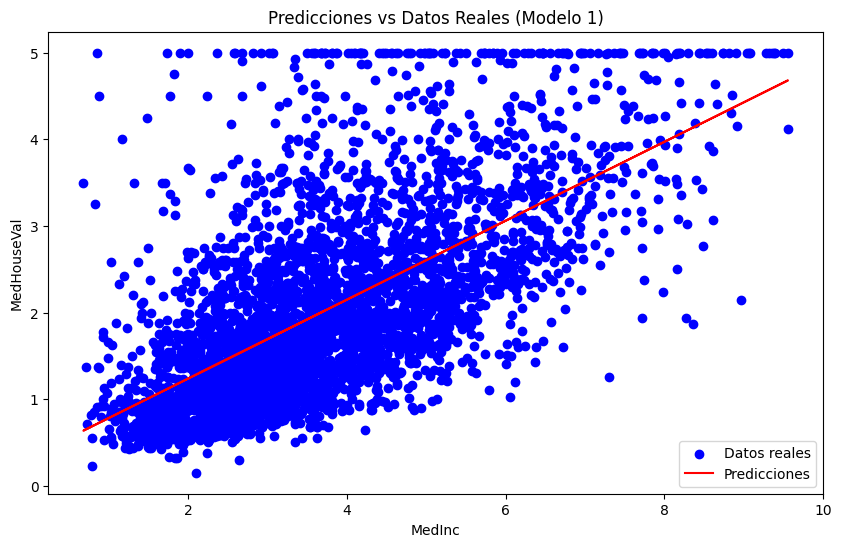

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X1_test, y_test, color='blue', label='Datos reales')
plt.plot(X1_test, y_pred1, color='red', label='Predicciones')
plt.title('Predicciones vs Datos Reales (Modelo 1)')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()

Observaciones: 

- La dispersión es más pronunciada en los valores medios y altos de MedInc

Muestra el intercepto y los coeficientes de la regresión lineal.

In [40]:
print(f"Intercepto: {modelo1.intercept_}")
print(f"Coeficiente de Medinc: {modelo1.coef_[0]}")

Intercepto: 0.3270256551785282
Coeficiente de Medinc: 0.45557150994838286


Observaciones: 

- Un intercepto positivo sugiere que hay un valor base para las casas independiente del ingreso

- Por cada unidad que aumenta el ingreso medio, el valor de la casa aumenta en aproximadamente 0.46 unidades

Entrena y evalúa otro modelo de regresión lineal utilizando diferentes características (por ejemplo, MedInc, HouseAge, AveRooms).

In [42]:
X2 = data[['MedInc', 'HouseAge', 'AveRooms']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo2 = LinearRegression()
modelo2.fit(X2_train, y_train)

y_pred2 = modelo2.predict(X2_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModelo 2:")
print(f"Error cuadrático medio: {mse2}")
print(f"Coeficiente de determinación: {r2_2}")


Modelo 2:
Error cuadrático medio: 0.6042974070222092
Coeficiente de determinación: 0.5011190806233796


Observaciones: 

- El error cuadratico medio mejorado respecto al Modelo 1

- Aunque mejoró, el modelo aún deja sin explicar una parte significativa de la variabilidad

Presenta una tabla con los coeficientes de cada característica.

In [43]:
coef_df = pd.DataFrame({
    'Característica': ['MedInc', 'HouseAge', 'AveRooms'],
    'Coeficiente': modelo2.coef_
})
print("\nCoeficientes del Modelo 2:")
print(coef_df)


Coeficientes del Modelo 2:
  Característica  Coeficiente
0         MedInc     0.600659
1       HouseAge     0.016058
2       AveRooms    -0.256711


Observaciones: 

- El ingreso medio sigue siendo el factor más influyente

- La edad de la casa tiene un impacto mínimo

Compara los resultados con el modelo anterior.

In [45]:
print(f"MSE Modelo 1 (Medinc): {mse1:}")
print(f"MSE Modelo 2 (Múltiples características): {mse2}")
print(f"R² Modelo 1: {r2_1}")
print(f"R² Modelo 2: {r2_2}")

MSE Modelo 1 (Medinc): 0.7122011785883996
MSE Modelo 2 (Múltiples características): 0.6042974070222092
R² Modelo 1: 0.412038551503771
R² Modelo 2: 0.5011190806233796


Observaciones:

- El Modelo 2 supera consistentemente al Modelo 1 en ambas métricas

- La inclusión de HouseAge y AveRooms ha mejorado significativamente el poder predictivo

¿Cuál de los dos modelos tiene un mejor rendimiento y por qué?

El Modelo 2 tiene un mejor rendimiento debido a:

  - Mayor capacidad explicativa (R² más alto)
  - Menor error en las predicciones (MSE más bajo)

Conclusiones:

- El modelo con múltiples características proporciona mejores resultados

- La correlación entre variables ayuda a seleccionar las características más relevantes